# Plotting and Visualization

In [22]:
from __future__ import division
from numpy.random import randn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
np.set_printoptions(precision=4)
import matplotlib.pyplot as plt

In [23]:
%matplotlib inline

In [24]:
%pwd

'/home/lex/BROSCORP/Pycharm/Projects/DataAnalysis/src'

## A brief matplotlib API primer

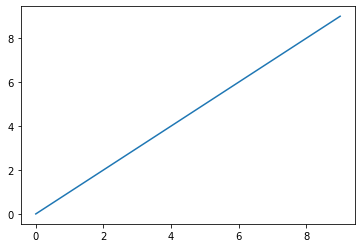

In [25]:
plt.plot(np.arange(10))

### Figures and Subplots

In [26]:
# new object
fig = plt.figure(1)

<Figure size 432x288 with 0 Axes>

In [27]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

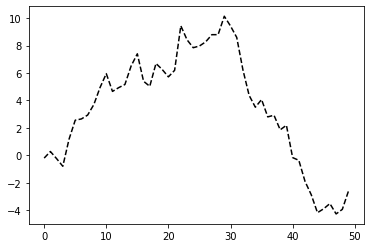

In [28]:
plt.plot(randn(50).cumsum(), 'k--')

In [29]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

In [30]:
plt.close('all')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d37d12ac0>,
      dtype=object)

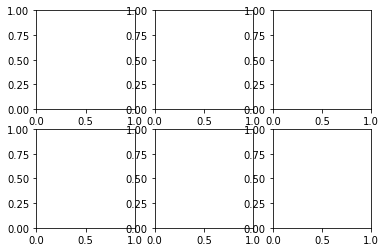

In [31]:
fig, axes = plt.subplots(2, 3)
axes

#### Adjusting the spacing around subplots

In [32]:
plt.subplots_adjust(
    left=None, bottom=None,
    right=None, top=None,
    wspace=None, hspace=None
)

<Figure size 432x288 with 0 Axes>

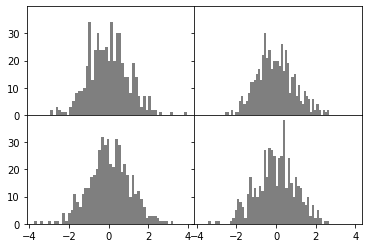

In [33]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

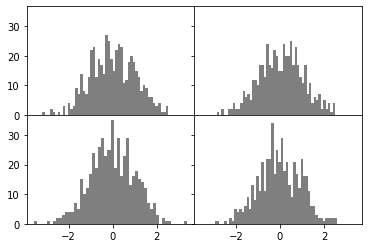

In [34]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, markers, and line styles

In [35]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

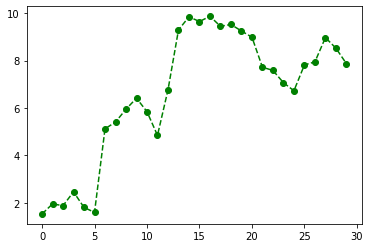

In [36]:
plt.plot(randn(30).cumsum(), 'ko--', color='g')

In [37]:
plt.close('all')

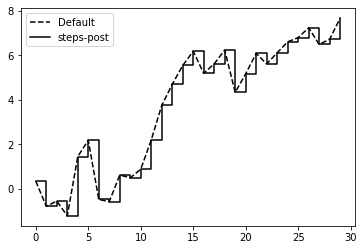

In [38]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

#### Setting the title, axis labels, ticks, and ticklabels

Text(0.5, 0, 'Stages')

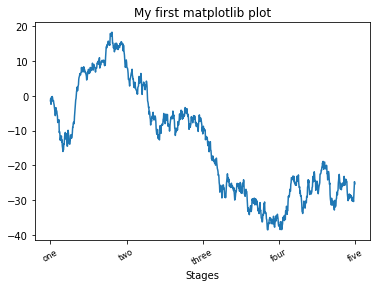

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(
    ['one', 'two', 'three', 'four', 'five'],
    rotation=30,
    fontsize='small'
)
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#### Adding legends

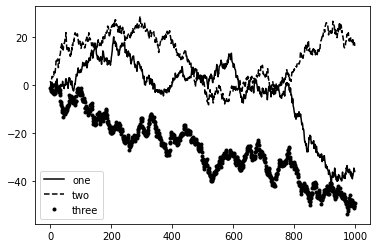

In [40]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

### Annotations and drawing on a subplot

Text(0.5, 1.0, 'Important dates in 2008-2009 financial crisis')

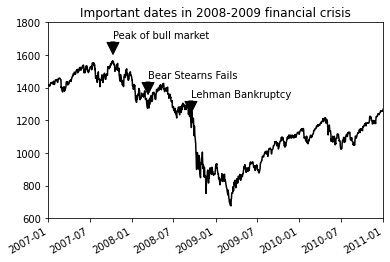

In [41]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('data/visual/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

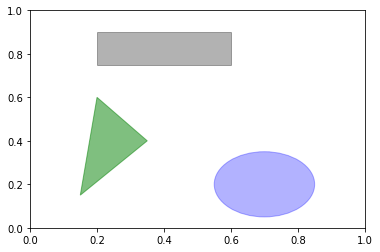

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving plots to file

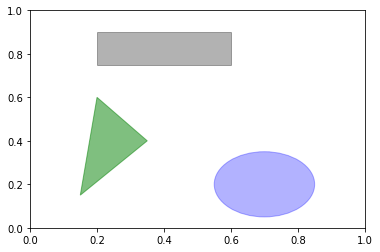

In [43]:
fig

In [44]:
fig.savefig('figpath.svg')
fig.savefig('figpath.pdf', dpi=400, bbox_inches='tight')

In [45]:
# save to file like object, without saving on disk
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

### matplotlib configuration

In [46]:
plt.rc('figure', figsize=(10, 10))

"""
It is possible to create own config file for matplotlib -> .rnatplotlibrc
Parameters avaliable at rnatplotliЬ/rnpl-data
"""

'\nIt is possible to create own config file for matplotlib -> .rnatplotlibrc\nParameters avaliable at rnatplotliЬ/rnpl-data\n'

### Line plots

In [47]:
plt.close('all')

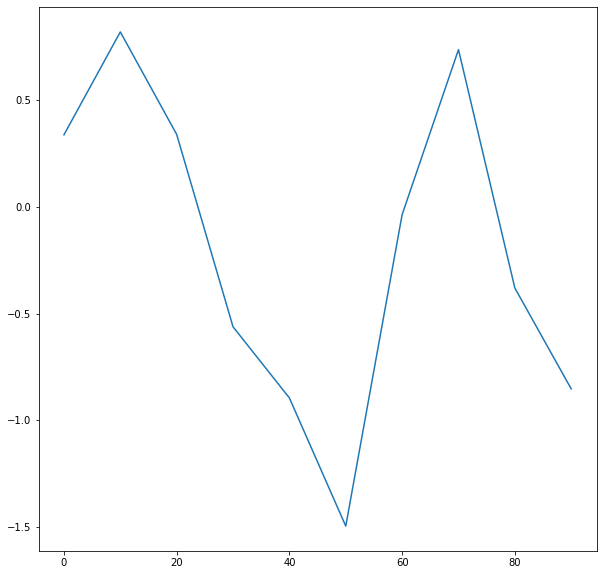

In [48]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

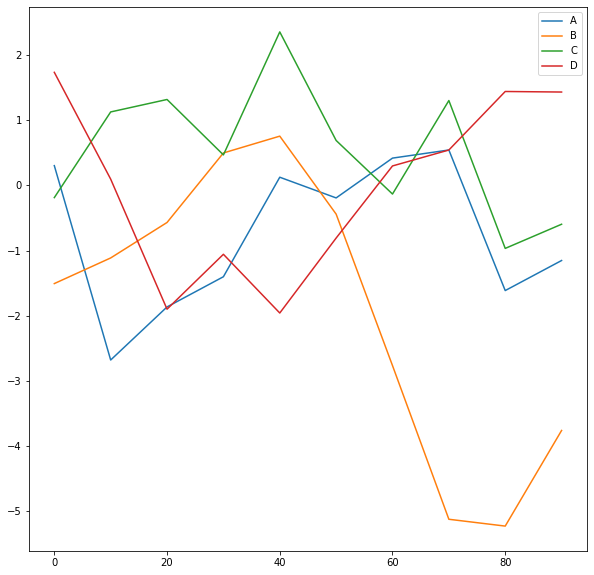

In [49]:
df = DataFrame(
    np.random.randn(10, 4).cumsum(0),
    columns=['A', 'B', 'C', 'D'],
    index=np.arange(0, 100, 10)
)
df.plot()

### Bar plots

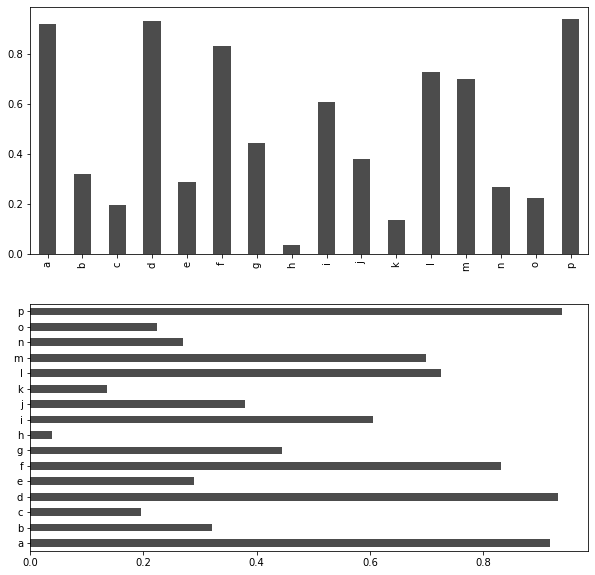

In [50]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

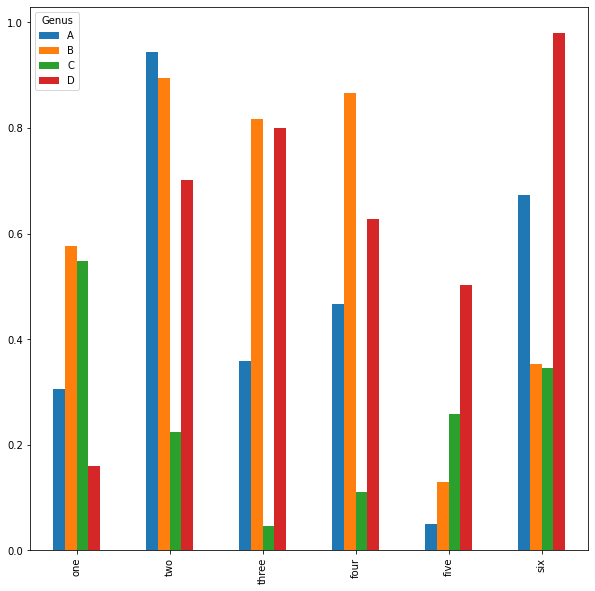

In [51]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar')

In [52]:
plt.figure()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

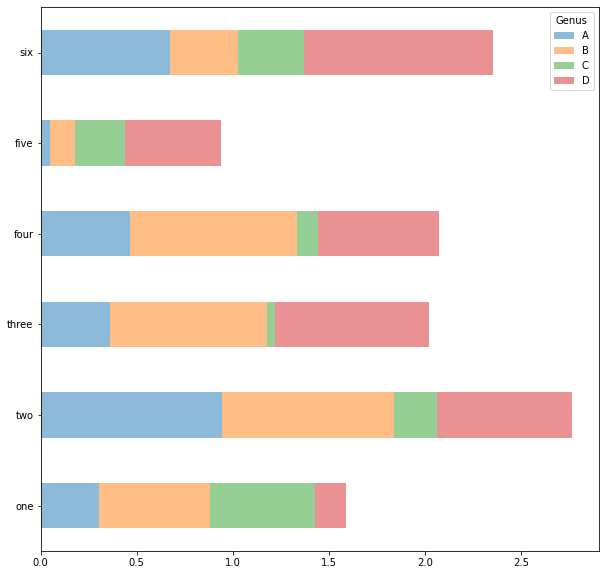

In [53]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [54]:
tips = pd.read_csv('data/visual/tips.csv')
party_counts = pd.crosstab(tips.day, tips.size)
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

### Histograms and density plots

In [55]:
plt.figure()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

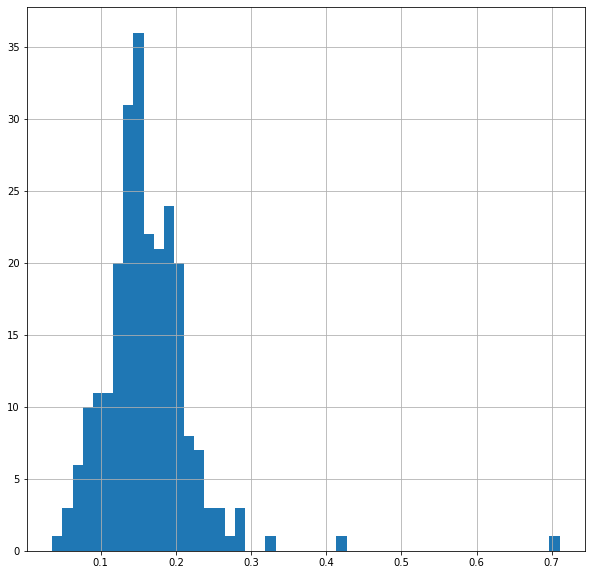

In [56]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

In [57]:
plt.figure()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

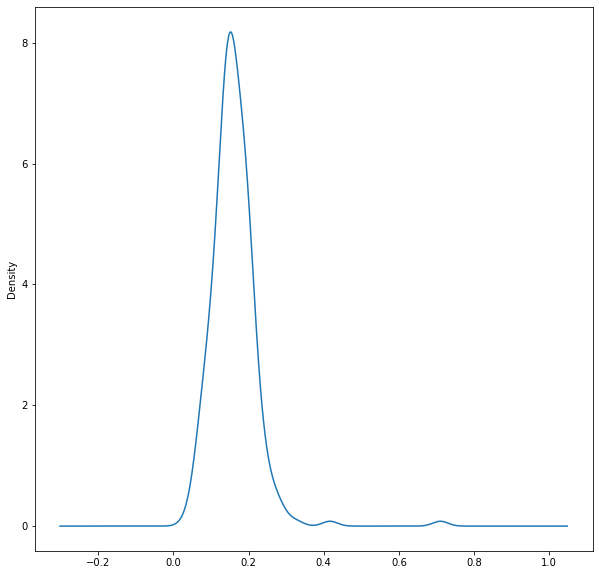

In [58]:
tips['tip_pct'].plot(kind='kde')

In [59]:
plt.figure()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

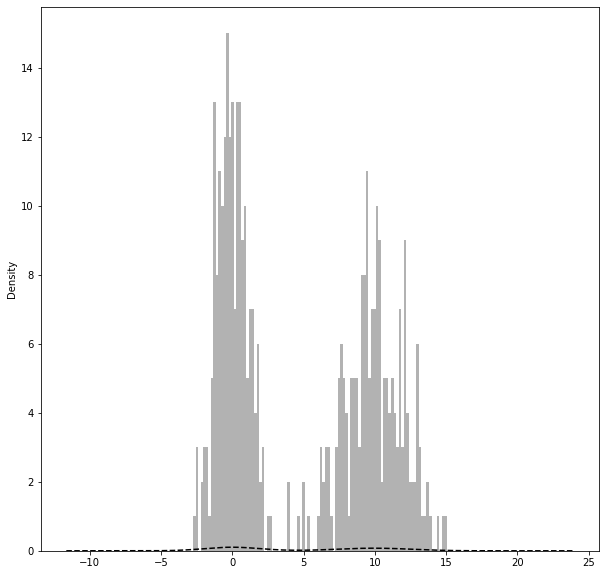

In [60]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k')
values.plot(kind='kde', style='k--')

### Scatter plots

In [61]:
macro = pd.read_csv('data/visual/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [62]:
plt.figure()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Changes in log m1 vs. log unemp')

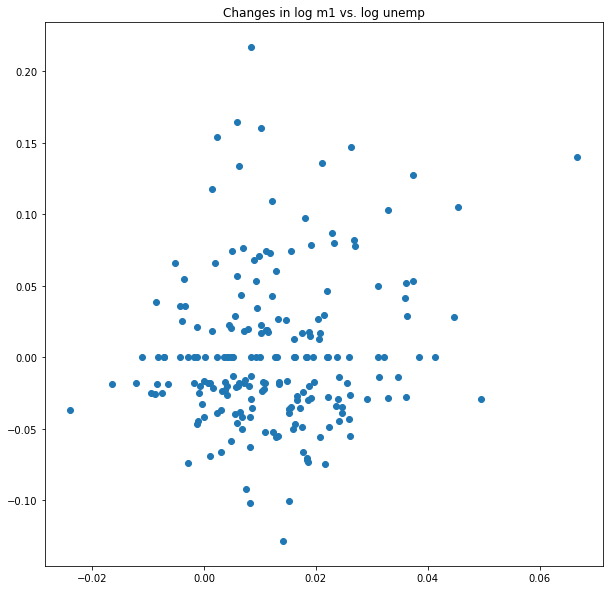

In [63]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d37833280>,
      dtype=object)

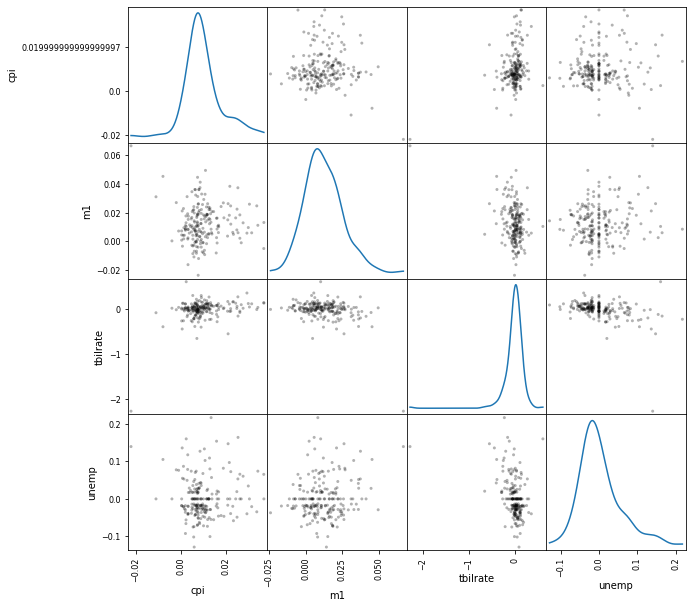

In [64]:
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)